## Oasis Internship Task 5
### Unemployment Analysis
#### by Dhyey Sampat

Importing required modules 

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Reading the data

In [3]:
sales = pd.read_csv('Advertising.csv',index_col=0)
sales.sample(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
85,213.5,43.0,33.8,21.7
47,89.7,9.9,35.7,10.6
70,216.8,43.9,27.2,22.3
16,195.4,47.7,52.9,22.4


# Exploratory Data Analysis 

In [4]:
sales.shape

(200, 4)

In [5]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


**Check the main assupmtions of linear Regression linearity , normality,mutlicolinearity,constant error variance**

1- linearity: which mean the relation between predictor(x) and outcome(y) must be linear realtiosn ship 

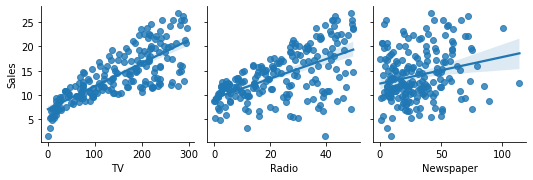

In [6]:
sns.pairplot(sales,x_vars=sales.columns[0:3],y_vars='Sales',kind='reg')

As we can depict from the above relation between newspaper that it is not linear, this will affect our model so may be we will remove this feature<br>
2-Normality: we need the outcome variable(y) to be normally distributed



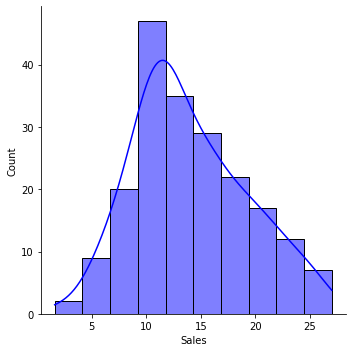

In [7]:
sns.distplot(sales.Sales,bins=10,color='blue',kde=True)

As we can see the Y variable is normally distribution as we want <br>
3- Mutlicolinearity assumption: which means the predictors (X) must not be corrlated to each other

<AxesSubplot:>

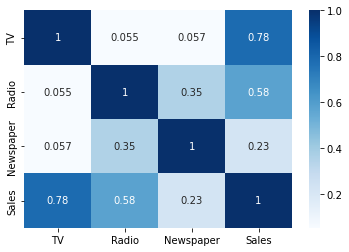

In [9]:
sns.heatmap(sales.corr(),annot=True,cmap="Blues")

As we can see the 3 variables not correlated with each other

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
r = sales[["TV", "Radio","Newspaper"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(3)]
vif_df["feature"] = ["TV", "Radio","Newspaper"]
vif_df

,VIF,feature
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


# Modelling <br>
1- First model with drop the newspaper feature

In [11]:
X = sales.drop(['Sales','Newspaper'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [12]:
lin_model = ols(formula="Sales ~ TV + Radio ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           4.83e-98
Time:                        22:35:22   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

2- try the model with Newspaper feature added 

In [13]:
X = sales.drop(['Sales'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [14]:
lin_model = ols(formula="Sales ~ TV + Radio + Newspaper ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        22:35:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

adding the news paper or remove it not affect the model too much 